<a href="https://colab.research.google.com/github/faizanahemad/eva/blob/master/assignment-4/2nd_Overfit_Regularize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **2nd File: Candidate Architectures**
    - Overfit here with more epochs (100 epochs)
    - Then try BN vs Dropout
    - Use both BN & Dropout
    - Total Candidates from this file = `8x3 = 24` (8 from prev, 3 BN/Dropout/BN+Dropout)
    - Again we will promote only 4 to next file based on performance and diversity
    

In [0]:
!pip install --upgrade --upgrade-strategy only-if-needed https://github.com/faizanahemad/data-science-utils/tarball/master > /dev/null

In [0]:
import pandas as pd
import numpy as np
import time
import gc
import os
import sys
import dill
from matplotlib import pyplot as plt
from keras import backend as K
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
import warnings
from data_science_utils.vision.keras import *
from keras.layers import Activation
warnings.filterwarnings("ignore")
%matplotlib inline
from keras.layers import Dropout

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [14]:

X_train, Y_train, X_test, Y_test = get_mnist_data()
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


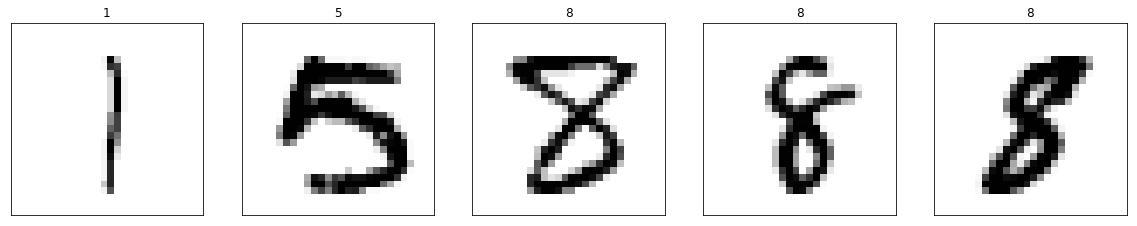

In [15]:
show_examples(X_train[10:15], Y_train[10:15],classes=get_mnist_labels())

# Increase Epochs

## Architecture 3 [Selected]

We tried 32 in 1st layer and then noticed that many of these kernels were empty. So we will use dropout to add more robustness

In [24]:
model = Sequential()
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) # 26
model.add(Dropout(0.1))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(16, 3,3, activation='relu')) # 24
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2, 2))) #12

model.add(Convolution2D(16, 3,3, activation='relu')) # 10
model.add(Dropout(0.1))
model.add(Convolution2D(16, 3,3, activation='relu')) # 8
model.add(Dropout(0.1))
model.add(Convolution2D(16, 3,3, activation='relu')) #6
model.add(Dropout(0.1))
model.add(Convolution2D(10, 1, activation='relu')) #6
model.add(Convolution2D(10, 6,6))

model.add(Flatten())
model.add(Activation('softmax'))
print("Params = ",model.count_params())


model.compile(loss='categorical_crossentropy',
             optimizer="adam",
             metrics=['accuracy'])

train_history = model.fit(X_train, Y_train, batch_size=2048, epochs=125, verbose=0, shuffle=True, validation_split=0.1)
print("Layer Names: ",[layer.name for layer in model.layers[0:]])
val_metrics = (train_history.history['val_loss'][-1],train_history.history['val_acc'][-1])
print("Validation Loss",val_metrics)

_=evaluate(model,X_train, Y_train,classes=get_mnist_labels(),print_results=True, plot_results=False)
_=evaluate(model,X_test, Y_test,classes=get_mnist_labels(),print_results=True, plot_results=False)


Params =  12846
Layer Names:  ['conv2d_98', 'dropout_20', 'conv2d_99', 'conv2d_100', 'dropout_21', 'max_pooling2d_10', 'conv2d_101', 'dropout_22', 'conv2d_102', 'dropout_23', 'conv2d_103', 'dropout_24', 'conv2d_104', 'conv2d_105', 'flatten_14', 'activation_14']
Validation Loss (0.018124877671400707, 0.9943333393732706)
 =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-= 
Total Model Params =  12846
Score =  [0.008622981054983879, 0.9978]
Balanced Accuracy = 99.78% 
 =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-= 
Total Model Params =  12846
Score =  [0.020632193985488267, 0.9941]
Balanced Accuracy = 99.40% 


Compute filters 0 to 32
  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31 32 filter processed.
Filter Losses:  [3.921415, 6.1820064, 1.5920584, 7.3741803, 2.8702078, 3.1731627, 3.6482878, 4.3066106, 2.558627, 3.4518764, 4.713408, 2.4541864, 4.5493083, 9.279961, 5.5153446, 4.4716587, 2.5628254, 8.998553, 3.4024947, 3.38672, 8.997358, 2.763129, 7.262477, 4.5563087, 0.28350115, 5.211242, 5.9286437, 9.5491495, 7.9007454, 5.688858, 2.285548, 2.040227]


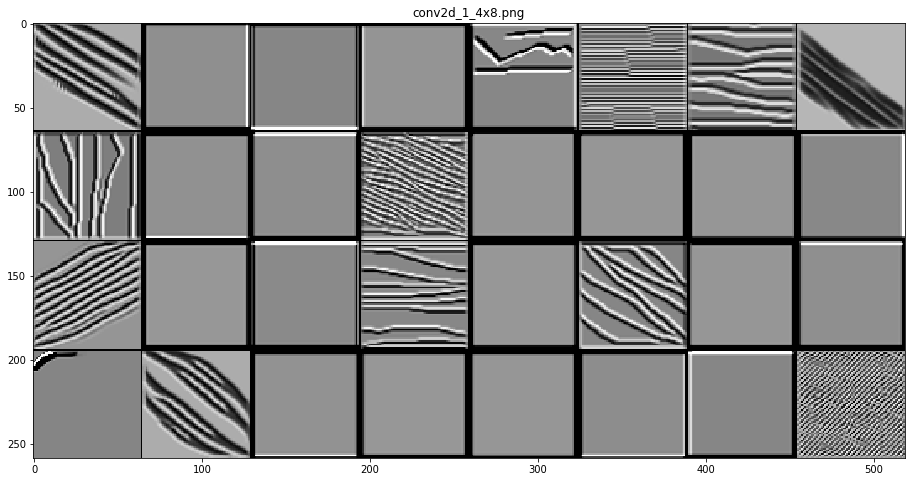

In [6]:
# Before Dropout 1st layer
visualize_layer(model,"conv2d_1",filter_range=(0,32),upscaling_steps=20,
                    upscaling_factor=1.05,
                    output_dim=(64, 64))

Compute filters 0 to 32
  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31 32 filter processed.
Filter Losses:  [3.1753514, 5.266266, 4.106048, 3.459911, 3.3014839, 4.3903084, 3.1228135, 4.280541, 2.2193506, 4.9824805, 4.6666403, 7.875684, 3.1128032, 3.5006912, 4.655442, 4.615824, 4.562746, 3.2990417, 2.9549356, 2.9543471, 2.8868082, 3.0473354, 3.0600755, 0.0, 10.831839, 8.705682, 1.9609928, 4.4270678, 5.416104, 4.2674217, 3.4784088, 4.0599475]


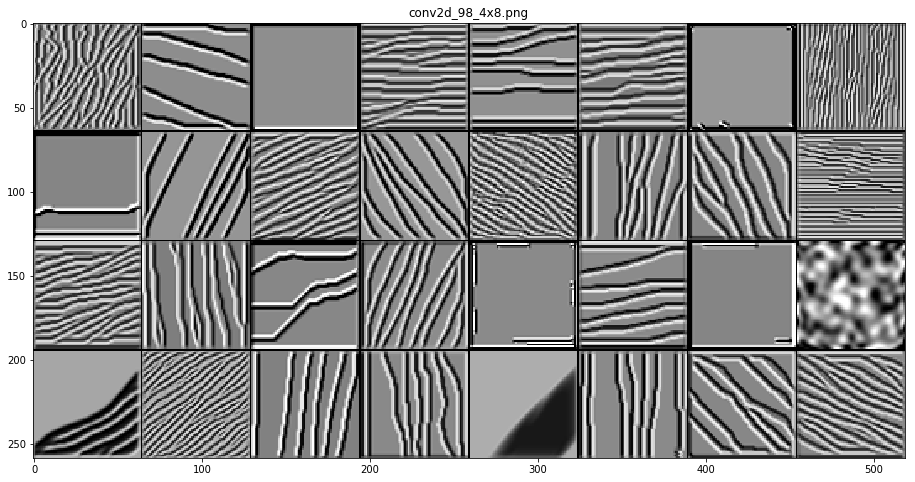

In [25]:
# After Dropout 1st layer
visualize_layer(model,"conv2d_98",filter_range=(0,32),upscaling_steps=20,
                    upscaling_factor=1.05,
                    output_dim=(64, 64))

From our experiments it seems 16 and 32 is more than enough for 1st layer. Lets try 8 though.

## Architecture 4 [Selected]
- 8->16 architecture
- Low number of Params

In [22]:

model = Sequential()

model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(28,28,1))) # 26
model.add(Convolution2D(16, 3,3, activation='relu')) # 24
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2, 2))) # 12
model.add(Convolution2D(8, 3,3, activation='relu')) # 10
model.add(Convolution2D(16, 3,3, activation='relu')) # 8
model.add(Dropout(0.1))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Dropout(0.1))
model.add(Convolution2D(16, 3,3, activation='relu')) # 6
model.add(Dropout(0.1))
model.add(Convolution2D(10, 6,6))



model.add(Flatten())
model.add(Activation('softmax'))
print("Params = ",model.count_params())

model.compile(loss='categorical_crossentropy',
             optimizer="adam",
             metrics=['accuracy'])

train_history = model.fit(X_train, Y_train, batch_size=2048, epochs=125, verbose=0, shuffle=True, validation_split=0.1)
print("Layer Names: ",[layer.name for layer in model.layers[0:]])
val_metrics = (train_history.history['val_loss'][-1],train_history.history['val_acc'][-1])
print("Validation Loss",val_metrics)

_=evaluate(model,X_train, Y_train,classes=get_mnist_labels(),print_results=True, plot_results=False)
_=evaluate(model,X_test, Y_test,classes=get_mnist_labels(),print_results=True, plot_results=False)


Params =  10972
Layer Names:  ['conv2d_91', 'conv2d_92', 'dropout_17', 'max_pooling2d_9', 'conv2d_93', 'conv2d_94', 'dropout_18', 'conv2d_95', 'conv2d_96', 'dropout_19', 'conv2d_97', 'flatten_13', 'activation_13']
Validation Loss (0.033576068898042044, 0.9906666609446207)
 =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-= 
Total Model Params =  10972
Score =  [0.011503298502152514, 0.9968333333333333]
Balanced Accuracy = 99.68% 
 =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-= 
Total Model Params =  10972
Score =  [0.024711952444340567, 0.9924]
Balanced Accuracy = 99.23% 


Compute filters 0 to 8
Costs of filter   0:     4 ( 5.59s )
Costs of filter   1:     4 ( 5.91s )
Costs of filter   2:    12 ( 6.25s )
Costs of filter   3:     9 ( 6.23s )
Costs of filter   4:    14 ( 5.92s )
Costs of filter   5:     4 ( 5.87s )
Costs of filter   6:     6 ( 5.96s )
Costs of filter   7:     9 ( 5.91s )
8 filter processed.
Filter Losses
 [3.7305198, 4.170247, 12.176837, 9.482343, 13.504718, 4.474886, 5.5848117, 9.459666]


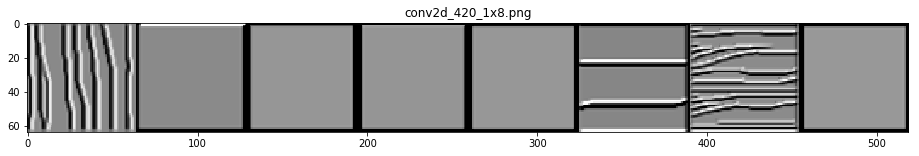

In [0]:
visualize_layer(model,"conv2d_420",filter_range=(0,8),upscaling_steps=20,
                    upscaling_factor=1.05,
                    output_dim=(64, 64))

In [0]:
visualize_layer(model,"1st layer",filter_range=(0,8),upscaling_steps=20,
                    upscaling_factor=1.05,
                    output_dim=(64, 64))

## Architecture 5 [Selected]

- Underfit
- Less params

In [18]:
model = Sequential()
model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(28,28,1))) # 26
model.add(Convolution2D(16, 3,3, activation='relu')) # 24
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2, 2))) #12
model.add(Convolution2D(10, 1, activation='relu'))

model.add(Convolution2D(16, 3,3, activation='relu')) # 10
model.add(Dropout(0.1))
model.add(Convolution2D(16, 3,3, activation='relu')) # 8
model.add(Dropout(0.1))
model.add(Convolution2D(10, 1, activation='relu')) #8
model.add(Convolution2D(10, 8,8))

model.add(Flatten())
model.add(Activation('softmax'))
print("Params = ",model.count_params())


model.compile(loss='categorical_crossentropy',
             optimizer="adam",
             metrics=['accuracy'])

train_history = model.fit(X_train, Y_train, batch_size=2048, epochs=125, verbose=0, shuffle=True, validation_split=0.1)
print("Layer Names: ",[layer.name for layer in model.layers[0:]])
val_metrics = (train_history.history['val_loss'][-1],train_history.history['val_acc'][-1])
print("Validation Loss",val_metrics)

_=evaluate(model,X_train, Y_train,classes=get_mnist_labels(),print_results=True, plot_results=False)
_=evaluate(model,X_test, Y_test,classes=get_mnist_labels(),print_results=True, plot_results=False)


Params =  11774
Layer Names:  ['conv2d_61', 'conv2d_62', 'dropout_5', 'max_pooling2d_7', 'conv2d_63', 'conv2d_64', 'dropout_6', 'conv2d_65', 'dropout_7', 'conv2d_66', 'conv2d_67', 'flatten_9', 'activation_9']
Validation Loss (0.029927360673745473, 0.9915000073115031)
 =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-= 
Total Model Params =  11774
Score =  [0.007135560005327594, 0.9983]
Balanced Accuracy = 99.83% 
 =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-= 
Total Model Params =  11774
Score =  [0.028718463688183694, 0.9917]
Balanced Accuracy = 99.16% 


## Architecture 9 [Selected]
- 7k params
- last layer is 5x5
- Underfit

In [19]:
model = Sequential()
model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(28,28,1))) # 26
model.add(Convolution2D(8, (3,3), activation='relu')) # 24
model.add(Dropout(0.1))
model.add(Convolution2D(16, (3,3), strides=2, activation='relu')) # 11
model.add(Dropout(0.1))
model.add(Convolution2D(16, 1, activation='relu'))
model.add(Dropout(0.1))
model.add(Convolution2D(16, (3,3), strides=2, activation='relu')) #5
model.add(Dropout(0.1))
model.add(Convolution2D(10, 1, activation='relu')) #3
model.add(Convolution2D(10, 5,5))

model.add(Flatten())
model.add(Activation('softmax'))
print("Params = ",model.count_params())


model.compile(loss='categorical_crossentropy',
             optimizer="adam",
             metrics=['accuracy'])

train_history = model.fit(X_train, Y_train, batch_size=2048, epochs=200, verbose=0, shuffle=True, validation_split=0.1)
print("Layer Names: ",[layer.name for layer in model.layers[0:]])
val_metrics = (train_history.history['val_loss'][-1],train_history.history['val_acc'][-1])
print("Validation Loss",val_metrics)

_=evaluate(model,X_train, Y_train,classes=get_mnist_labels(),print_results=True, plot_results=False)
_=evaluate(model,X_test, Y_test,classes=get_mnist_labels(),print_results=True, plot_results=False)


Params =  7104
Layer Names:  ['conv2d_68', 'conv2d_69', 'conv2d_70', 'dropout_8', 'conv2d_71', 'conv2d_72', 'dropout_9', 'conv2d_73', 'conv2d_74', 'flatten_10', 'activation_10']
Validation Loss (0.03349008316795031, 0.990166658560435)
 =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-= 
Total Model Params =  7104
Score =  [0.018942754183426343, 0.9945166666666667]
Balanced Accuracy = 99.45% 
 =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-= 
Total Model Params =  7104
Score =  [0.03126020020658616, 0.9904]
Balanced Accuracy = 99.03% 


## Architecture 12 [Selected]
- Only 6k params
- uses strides instead of MaxPool twice
- Acceptable performance

In [20]:
model = Sequential()
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1))) # 26
model.add(Dropout(0.1))
model.add(Convolution2D(8, 1, activation='relu'))
model.add(Convolution2D(8, (3,3), activation='relu')) # 24
model.add(Dropout(0.1))
model.add(Convolution2D(16, (3,3), strides=2, activation='relu')) # 11
model.add(Dropout(0.1))
model.add(Convolution2D(8, 1, activation='relu'))
model.add(Convolution2D(16, (3,3), strides=2, activation='relu')) #5
model.add(Dropout(0.1))
model.add(Convolution2D(10, 1, activation='relu')) #3
model.add(Convolution2D(10, 5,5))

model.add(Flatten())
model.add(Activation('softmax'))
print("Params = ",model.count_params())


model.compile(loss='categorical_crossentropy',
             optimizer="adam",
             metrics=['accuracy'])

train_history = model.fit(X_train, Y_train, batch_size=2048, epochs=200, verbose=0, shuffle=True, validation_split=0.1)
print("Layer Names: ",[layer.name for layer in model.layers[0:]])
val_metrics = (train_history.history['val_loss'][-1],train_history.history['val_acc'][-1])
print("Validation Loss",val_metrics)

_=evaluate(model,X_train, Y_train,classes=get_mnist_labels(),print_results=True, plot_results=False)
_=evaluate(model,X_test, Y_test,classes=get_mnist_labels(),print_results=True, plot_results=False)


Params =  6032
Layer Names:  ['conv2d_75', 'dropout_10', 'conv2d_76', 'conv2d_77', 'conv2d_78', 'dropout_11', 'conv2d_79', 'conv2d_80', 'dropout_12', 'conv2d_81', 'conv2d_82', 'flatten_11', 'activation_11']
Validation Loss (0.03517085702220599, 0.9898333406448364)
 =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-= 
Total Model Params =  6032
Score =  [0.02041778962048314, 0.9936]
Balanced Accuracy = 99.36% 
 =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-= 
Total Model Params =  6032
Score =  [0.0305063575736247, 0.9905]
Balanced Accuracy = 99.04% 


# Misc Code

In [0]:
K.epsilon()

1e-07

In [0]:
layer = model.layers[0]
weights = layer.get_weights()[0]
len(weights)
weights.shape
print()
weights[:,:,:,0]

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_74 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 26, 26, 16)        1040      
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 24, 24, 16)        2320      
_________________________________________________________________
conv2d_77 (Conv2D)           (None, 22, 22, 16)        2320      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 11, 11, 16)        0         
_________________________________________________________________
conv2d_78 (Conv2D)           (None, 9, 9, 16)          2320      
_________________________________________________________________
conv2d_79 (Conv2D)           (None, 7, 7, 32)          4640      
__________

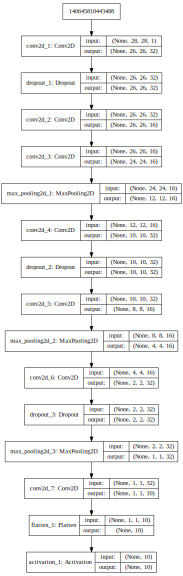

In [0]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

m2d = model_to_dot(model, show_shapes=True,)
m2d.set_size('8x18')
SVG(m2d.create(prog='dot', format='svg'))